In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , LabelEncoder

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error , r2_score

2024-03-03 11:33:55.466503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 11:33:55.466672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 11:33:55.651367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
 df = pd.read_csv("/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv",encoding='ISO-8859-1')

# Showing Data

In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Describing data for better insight

In [4]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
# name,email and country are not needed

df.drop(columns = ['customer name' , 'customer e-mail' , 'country'] , inplace = True)
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
# y is car purchase amount 
y = df[['car purchase amount']]
# x is the rest 
x = df.drop(columns = ['car purchase amount'])

# Show y and x

In [7]:
y.head()

,car purchase amount
0,35321.45877
1,45115.52566
2,42925.70921
3,67422.36313
4,55915.46248


In [8]:
x.head()

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


**Scaling**

In [9]:
Scaler = MinMaxScaler()
x = Scaler.fit_transform(x)
y = Scaler.fit_transform(y)

**Splitting data**

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1 , random_state = 42)

**Model**

In [11]:
model = Sequential([
    Dense(10,activation = 'relu' , input_dim = 5),
    Dense(15,activation = 'relu' ),
    Dense(1,activation = 'linear' )
])
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

# Tracing loss

In [13]:
error_tracing = model.fit(x_train , y_train , epochs = 175 , validation_split = 0.2 )

Epoch 1/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6530 - val_loss: 0.5085
Epoch 2/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4660 - val_loss: 0.3325
Epoch 3/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3163 - val_loss: 0.1854
Epoch 4/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1681 - val_loss: 0.0891
Epoch 5/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0914 - val_loss: 0.0394
Epoch 6/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0422 - val_loss: 0.0234
Epoch 7/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277 - val_loss: 0.0213
Epoch 8/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - val_loss: 0.0197
Epoch 9/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - val_loss: 0.0178
Epoch 10/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - val_loss: 0.0161
Epoch 11/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - val_loss: 0.0149
Epoch 12/175
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [14]:
tr_loss = error_tracing.history['loss']
val_loss = error_tracing.history['val_loss']

# Plotting

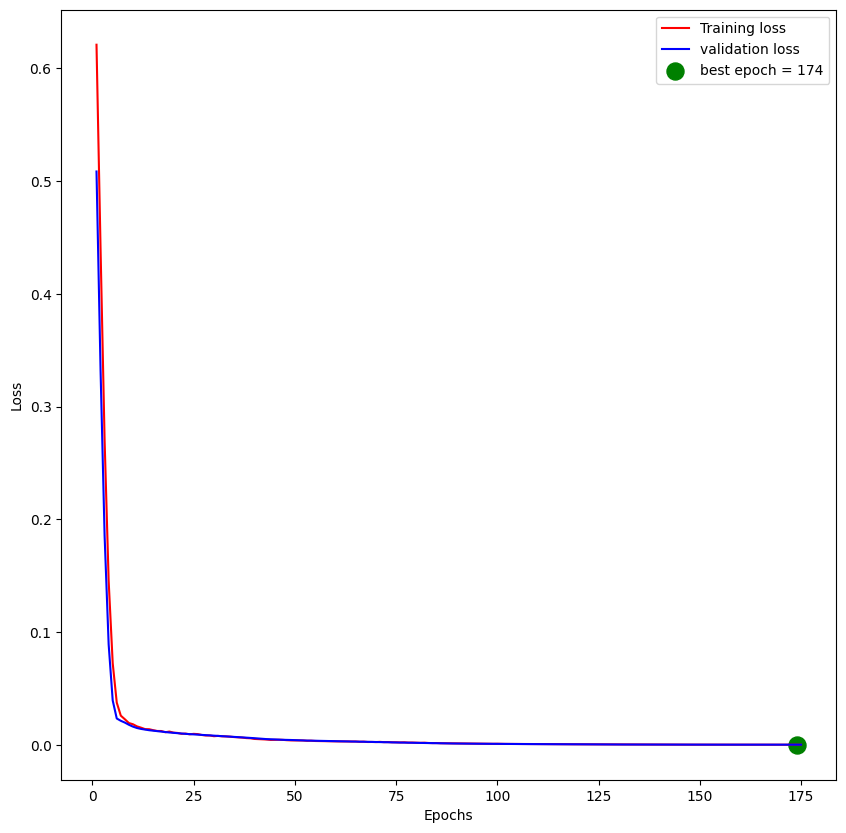

In [15]:
index_loss=np.argmin(val_loss)
val_lowest=val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]

loss_label=f"best epoch = {index_loss+1}"

plt.figure(figsize=(10,10))

plt.plot(Epochs,tr_loss,'r',label='Training loss')
plt.plot(Epochs,val_loss,'b',label='validation loss')

plt.scatter(index_loss + 1 , val_lowest,c='green',s=150,label=loss_label)

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [16]:
y_hat = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [17]:
mean_squared_error(y_test,y_hat)

6.44717006301325e-05

In [18]:
r2_score(y_test,y_hat)

0.9968260156497585